<h2>1) Using PCA to reduce the number of dimensions in Semi-Conductor Data</h2>
<p>If there’s some flaw in the manufacturing process, we need to know as soon as possible, so
    that precious time isn’t spent processing a flawed product. Some common engineering solutions find failed products, such as test early and test often. But some defects slip through.If machine learning techniques can be used to further reduce errors, it will save the manufacturer a lot of money.
    Dataset:http://archive.ics.uci.edu/ml/datasets/SECOM
    <ol>
        <li>Handle the missing values in the data.</li>
        <li>Create the Covariance Matrix for all the features in the data.</li>
        <li>Calculate the Eigen Values and Eigen Vectors</li>
        <li>Plot the amount of variance that is preserved across each principal component and try to figure out the optimal number of principal components that we can get.</li>
        <li>Finally make a list of top 7 principal-components based values of their variances.</li>
     </ol>

In [0]:
import pandas as pd
import numpy as np

In [2]:
urldata="http://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom.data"
data = pd.read_csv(urldata,sep=" ",header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


<h3>Loading the data and data preprocessing</h3>

<h3>It seems the data contains some missing values and we have to find in how many features do they present and use techniques to missing values.While performing PCA it is better if we handle the missing values with the mean value of the feature</h3> 

In [3]:
a=list(data.isna().sum())
a.sort()
print(a[len(a)-6:len(a)])

[1341, 1341, 1429, 1429, 1429, 1429]


In [0]:
for i in list(data):
  data[i] = data[i].fillna(data[i].mean())

<h3>Bringing all the data's distribution to the similar distribution by subtracting each column from its mean</h3>

In [5]:
data.head(10)

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,0.005396,97.934373,0.5005,0.0118,0.0035,2.3630,0.021458,0.016475,0.005283,99.670066
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.006000,208.204500,0.5019,0.0223,0.0055,4.4447,0.009600,0.020100,0.006000,208.204500
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.014800,82.860200,0.4958,0.0157,0.0039,3.1745,0.058400,0.048400,0.014800,82.860200
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.004400,73.843200,0.4990,0.0103,0.0025,2.0544,0.020200,0.014900,0.004400,73.843200
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,0.005396,97.934373,0.4800,0.4766,0.1045,99.3032,0.020200,0.014900,0.004400,73.843200
5,2946.25,2432.84,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5287,0.0167,...,0.005200,44.007700,0.4949,0.0189,0.0044,3.8276,0.034200,0.015100,0.005200,44.007700
6,3030.27,2430.12,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.5816,-0.0270,...,0.005396,97.934373,0.5010,0.0143,0.0042,2.8515,0.034200,0.015100,0.005200,44.007700
7,3058.88,2690.15,2248.9000,1004.4692,0.7884,100.0,106.2400,0.1185,1.5153,0.0157,...,0.006300,95.031000,0.4984,0.0106,0.0034,2.1261,0.020400,0.019400,0.006300,95.031000
8,2967.68,2600.47,2248.9000,1004.4692,0.7884,100.0,106.2400,0.1185,1.5358,0.0111,...,0.004500,111.652500,0.4993,0.0172,0.0046,3.4456,0.011100,0.012400,0.004500,111.652500
9,3016.11,2428.37,2248.9000,1004.4692,0.7884,100.0,106.2400,0.1185,1.5381,0.0159,...,0.007300,90.229400,0.4967,0.0152,0.0038,3.0687,0.021200,0.019100,0.007300,90.229400


In [0]:
def mean(x):
  return x-np.mean(x)
data=data.apply(mean)

In [7]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,16.477104,68.149769,-12.814018,14.749873,-2.836813,0.0,-3.499608,0.002378,0.037638,0.017041,...,8.673617e-19,1.421085e-14,0.000404,-0.003518,-0.000347,-0.704826,0.000000,0.000000,1.734723e-18,1.421085e-14
1,81.327104,-30.710231,29.874882,67.283973,-3.367613,0.0,1.230392,0.002878,0.033738,0.000341,...,6.040453e-04,1.102701e+02,0.001804,0.006982,0.001653,1.376874,-0.011858,0.003625,7.166667e-04,1.085344e+02
2,-81.842896,64.089769,-14.136218,301.640573,-2.686813,0.0,-5.625108,0.002278,-0.019262,0.004941,...,9.404045e-03,-1.507417e+01,-0.004296,0.000382,0.000053,0.106674,0.036942,0.031925,9.516667e-03,-1.680987e+01
3,-25.732896,-15.950231,-1.514018,-486.584027,-2.876613,0.0,3.123792,-0.000122,0.025338,-0.011559,...,-9.959547e-04,-2.409117e+01,-0.001096,-0.005018,-0.001347,-1.013426,-0.001258,-0.001575,-8.833333e-04,-2.582687e+01
4,17.787104,7.019769,32.819382,-69.856627,-2.663613,0.0,-0.716208,0.001678,0.040238,-0.002259,...,8.673617e-19,1.421085e-14,-0.020096,0.461282,0.100653,96.235374,-0.001258,-0.001575,-8.833333e-04,-2.582687e+01


<h2>Principal Component Analysis Algorithm<h2>
  <p>The PCA algorithm involves a sequence of steps that must be performed:</p>
  <ol>
    <li>Data Preprocessing</li>
    <li>Compute "covariance Matrix"</li>
    <li>Compute "eigenvectors" of covariance matrix </li>
    <li>Take the first k columns of the U matrix and compute z</li>

<h2>The first must step is Data preprocessing<h2>
 <h3>It involves preprocess(using techniques like feature scaling,mean normalization).
   Here,Will try data standardization</h3>
  <h2>Standardizing data</h2>
  <h2>To standardize apply:
    <br>
    For the  data set : <em>x</em><sup>(1)</sup>,<em>x</em><sup>(2)</sup>,<em>x</em><sup>(3)</sup>......<em>x</em><sup>(n)</sup>:
   <br> Preprocess it as :<br></h2>
  <h2>&mu;<sub>j</sub>=1/m*sum(<em>x</em><sub>j</sub><sup>i</sup>)
    

In [0]:
for i in list(data):
  mean = data[i].mean()
  std = data[i].std()
  if std>0:
    data[i] = data[i].apply(lambda x:(x-mean)/std)    

In [9]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,0.224237,0.849453,-0.436134,0.033544,-0.050564,0.0,-0.563610,0.266184,0.509664,1.128056,...,-2.405515e-17,8.699675e-17,0.118661,-0.204825,-0.093178,-0.197050,-2.523354e-16,-8.046843e-17,3.456881e-16,-2.792284e-17
1,1.106783,-0.382788,1.016812,0.153018,-0.060025,0.0,0.198154,0.322141,0.456854,0.022574,...,3.088356e-01,2.007239e+00,0.530034,0.406549,0.444564,0.384936,-9.598680e-01,4.117217e-01,2.500445e-01,1.156320e+00
2,-1.113803,0.798847,-0.481136,0.685994,-0.047891,0.0,-0.905921,0.254993,-0.260824,0.327078,...,4.808089e+00,-2.743940e-01,-1.262377,0.022257,0.014371,0.029823,2.990196e+00,3.625906e+00,3.320359e+00,-1.790914e-01
3,-0.350200,-0.198812,-0.051531,-1.106595,-0.051274,0.0,0.503085,-0.013598,0.343108,-0.765164,...,-5.092106e-01,-4.385298e-01,-0.322096,-0.292164,-0.362049,-0.283326,-1.018622e-01,-1.788704e-01,-3.081944e-01,-2.751580e-01
4,0.242065,0.087498,1.117030,-0.158869,-0.047477,0.0,-0.115345,0.187845,0.544871,-0.149536,...,-2.405515e-17,8.699675e-17,-5.905014,26.858657,27.062785,26.904758,-1.018622e-01,-1.788704e-01,-3.081944e-01,-2.751580e-01


In [0]:
#  data.isna().sum()

In [11]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
count,1567.000000,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03,1567.0,1567.000000,1.567000e+03,1.567000e+03,1.567000e+03,...,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03,1567.000000
mean,0.000000,1.927126e-17,-1.360324e-17,-1.813766e-17,-4.534414e-18,0.0,0.000000,-2.267207e-17,1.813766e-17,-4.534414e-18,...,2.493928e-17,9.068829e-18,-1.133604e-17,-4.534414e-18,-1.133604e-18,-4.534414e-18,1.813766e-17,3.627532e-17,-9.068829e-18,0.000000
std,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.0,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000
min,-3.690945,-4.201789e+00,-4.761160e+00,-3.175656e+00,-6.266169e-02,0.0,-3.057011,-1.363338e+01,-3.681300e+00,-3.479222e+00,...,-2.247559e+00,-1.782692e+00,-6.551457e+00,-5.425362e-01,-5.771453e-01,-5.228917e-01,-3.104882e+00,-1.507703e+00,-1.494452e+00,-1.061880
25%,-0.650347,-5.355405e-01,-6.619044e-01,-7.106702e-01,-5.666915e-02,0.0,-0.511350,-8.074529e-02,-6.988776e-01,-6.592497e-01,...,-2.405515e-17,-1.162206e-01,-6.453174e-01,-2.164701e-01,-2.007260e-01,-2.128459e-01,-6.482338e-01,-6.672447e-01,-6.919837e-01,-0.589179
50%,-0.035559,3.813852e-02,1.389617e-02,-2.479410e-01,-5.133254e-02,0.0,0.061085,6.474133e-02,-1.708426e-02,-3.038272e-02,...,-2.405515e-17,8.699675e-17,3.050960e-02,-8.837276e-02,-6.629059e-02,-8.670279e-02,-7.757903e-02,-1.902279e-01,-2.384146e-01,-0.294550
75%,0.572765,5.346622e-01,5.959029e-01,4.407269e-01,-4.754487e-02,0.0,0.550321,2.214192e-01,7.310604e-01,6.117235e-01,...,-2.405515e-17,8.699675e-17,6.622609e-01,6.883765e-02,6.814487e-02,6.349751e-02,4.971229e-01,4.344368e-01,3.896043e-01,0.160658
max,4.652889,4.369929e+00,3.904552e+00,5.273135e+00,1.979107e+01,0.0,4.531819,7.586006e-01,2.620718e+00,5.013792e+00,...,1.186374e+01,1.163841e+01,2.851353e+00,2.685866e+01,2.706279e+01,2.690476e+01,6.584107e+00,7.203531e+00,8.135170e+00,6.793326


In [12]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,0.224237,0.849453,-0.436134,0.033544,-0.050564,0.0,-0.563610,0.266184,0.509664,1.128056,...,-2.405515e-17,8.699675e-17,0.118661,-0.204825,-0.093178,-0.197050,-2.523354e-16,-8.046843e-17,3.456881e-16,-2.792284e-17
1,1.106783,-0.382788,1.016812,0.153018,-0.060025,0.0,0.198154,0.322141,0.456854,0.022574,...,3.088356e-01,2.007239e+00,0.530034,0.406549,0.444564,0.384936,-9.598680e-01,4.117217e-01,2.500445e-01,1.156320e+00
2,-1.113803,0.798847,-0.481136,0.685994,-0.047891,0.0,-0.905921,0.254993,-0.260824,0.327078,...,4.808089e+00,-2.743940e-01,-1.262377,0.022257,0.014371,0.029823,2.990196e+00,3.625906e+00,3.320359e+00,-1.790914e-01
3,-0.350200,-0.198812,-0.051531,-1.106595,-0.051274,0.0,0.503085,-0.013598,0.343108,-0.765164,...,-5.092106e-01,-4.385298e-01,-0.322096,-0.292164,-0.362049,-0.283326,-1.018622e-01,-1.788704e-01,-3.081944e-01,-2.751580e-01
4,0.242065,0.087498,1.117030,-0.158869,-0.047477,0.0,-0.115345,0.187845,0.544871,-0.149536,...,-2.405515e-17,8.699675e-17,-5.905014,26.858657,27.062785,26.904758,-1.018622e-01,-1.788704e-01,-3.081944e-01,-2.751580e-01


<h2>2.Compute the covariance matrix(&Sigma;):</h2>
<h2>&Sigma;=(1/n)*&Sigma;<sup>n</sup><sub>i=1</sub>(<em>x<sup>i</sup></em>)<sup>T</sup>(<em>x<sup>i</sup></em>)</h2>


In [13]:
x=data.values
# print(x)
# print(x.shape) 
y=(np.dot(np.transpose(x),x)/len(x))
print(y.shape)
sigma = (np.matmul(np.transpose(x),x))/len(x)
sigma.shape
# print(sigma)

(590, 590)


(590, 590)

<h3>3.Compute the eigen values and eigen vectors for the convariance matrix.To compute this we will use the following algorithm <em>POWER ITERATION METHOD</em> which is available from here : [Eigen Value Algorithms](https://en.wikipedia.org/wiki/Eigenvalue_algorithm#Iterative_algorithms)</h3><em>PENDING</em>

In [0]:
# def rayleigh_quotient(A,epsilon,mu,x):
#   x=x/np.linalg.norm(x)
#   y = (A-mu*np.identity(A.shape[0]))/x
#   lamda = np.transpose(y)*x
#   mu = mu+1/lamda
#   err = np.linalg.norm(y-lamda*x)/np.linalg.norm(y)
#   while err>epsilon:
#     x=x/np.linalg.norm(x)
#     y = (A-mu*np.identity(A.shape[0]))/x
#     lamda = np.transpose(y)*x
#     mu = (mu+1)/lamda
#     err = np.linalg.norm(y-lamda*x)/np.linalg.norm(y)

    

In [0]:
# def power_iteration(A, num_simulations):
#   b_k = np.random.rand(A.shape[1])
#   b_k1 = np.dot(A, b_k)
#   b_k1_norm = np.linalg.norm(b_k1)
#   b_k = b_k1 / b_k1_norm
#   scores=np.array(b_k)
#   for _ in range(num_simulations-1):
#     b_k1 = np.dot(A, b_k)
#     b_k1_norm = np.linalg.norm(b_k1)
#     b_k = b_k1 / b_k1_norm
#     scores=np.insert(scores,0,b_k,axis=0)
# #     print(scores)
#   scores = np.transpose(scores)
# #   print(scores)
#   return scores
# power_iteration(sigma, len(sigma)).shape

In [0]:
# def power_iteration_1(A):
#   b_k = np.random.rand(A.shape[1])
#   b_k1 = np.dot(A, b_k)
#   b_k1_norm = np.linalg.norm(b_k1)
#   b_k = b_k1 / b_k1_norm
#   scores=np.array(b_k)
#   temp = b_k
#   while True:
#     b_k1 = np.dot(A, b_k)
#     b_k1_norm = np.linalg.norm(b_k1)
#     b_k = b_k1 / b_k1_norm
#     scores=np.insert(scores,0,b_k,axis=0)
#     if temp.all()==b_k.all():
#       break
#   return np.transpose(scores)

# print(power_iteration_1(sigma).shape)


In [36]:
from scipy.linalg import eigh
values,vectors=eigh(sigma)
print(vectors.shape)
print("=============================================================================")
print(values.shape)
# vectors[563:573]

(590, 590)
(590,)


In [16]:
print(values[589])

26.334467472673232


<h4>Q:Plot the amount of variance that is preserved across each principal component and try to figure out the optimal number of principal components that we can get</h4>
<h4>Amount of variance preserved by each component given by:<h3> <em>&lambda;<sub>i</sub></em>=<em>&lambda;<sub>i</sub></em>/&Sigma;(&lambda;<sub>i=0</sub><sup>n</sup>)</h3>

In [0]:

var=values/np.sum(values)*100
components= list(range(len(var)))
cumulative_var = np.cumsum(var)
# print(cumulative_var)

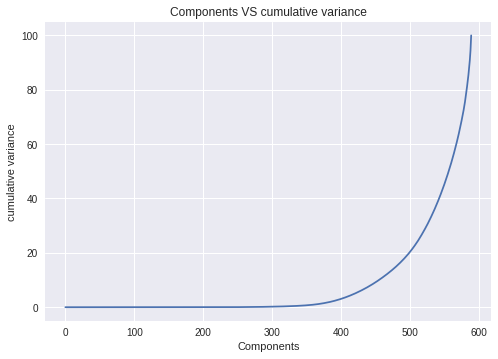

In [30]:
#Plotting cumulative variance curve for the components
plt.plot(cumulative_var)
plt.xlabel("Components")
plt.ylabel("cumulative variance")
plt.title("Components VS cumulative variance")
plt.show()


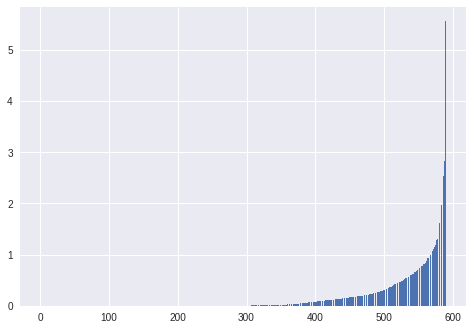

In [18]:
import matplotlib.pyplot as plt
plt.bar(components,var,align='edge')
plt.show()

<p>It seems the values are in the range of 1250 to 1567 has higher variance and retain maximum information.</p>

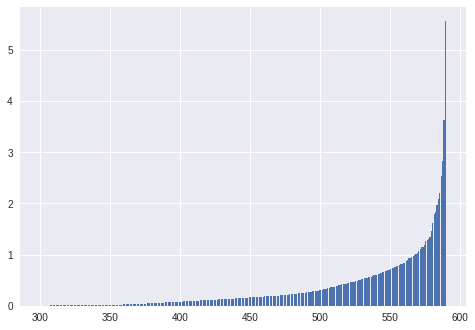

In [19]:
plt.bar(components[300:600],var[300:600],align='edge')
plt.show()

<p>Since,we need 7 maximum components .We will take them and plot classes for first two principal components</p>

<h3>4.Take the first k columns of the U matrix and compute z</h3>

<h3>Q:Listing Top-7 principal components for the data</h3>

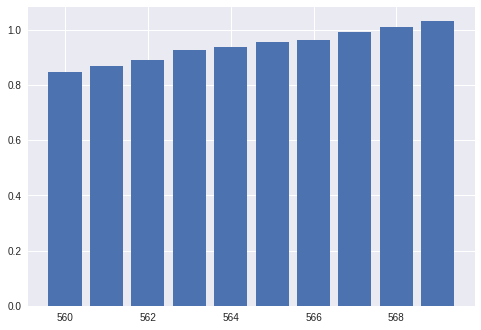

In [20]:
plt.bar(components[560:570],var[560:570])
plt.show()

In [41]:
# print(list(map(str,range(1,8,1))))
Top7 = pd.DataFrame(data=vectors[:,563:570],columns=list(map(str,range(1,8,1))))
Top7.head(15)

,1,2,3,4,5,6,7
0,-2.303710e-02,2.899143e-02,-3.384355e-03,1.144074e-02,-2.256754e-03,2.488593e-02,5.579821e-02
1,2.301520e-02,-7.992257e-03,-1.529793e-03,2.070954e-02,-5.690074e-03,-6.780963e-04,-3.685877e-02
2,-3.696154e-02,9.419325e-03,-3.724327e-02,-1.682002e-02,-1.868608e-02,1.750989e-03,5.592597e-03
3,-5.919613e-02,2.428872e-02,-3.868769e-02,-3.882965e-02,2.950038e-02,5.057031e-02,-2.314192e-02
4,-3.423610e-02,-3.616110e-02,4.370842e-03,3.911514e-02,6.509553e-02,3.252099e-03,-1.949172e-02
5,0.000000e+00,6.938894e-17,2.602085e-17,-1.387779e-17,-2.949030e-17,0.000000e+00,5.551115e-17
6,5.472550e-02,1.417991e-02,3.996724e-02,4.142672e-02,-3.724170e-02,-6.107860e-02,3.601404e-02
7,5.335267e-02,-1.209077e-02,4.047135e-03,2.112904e-02,-1.919765e-02,6.194417e-02,1.842728e-02
8,-8.365413e-03,-3.530842e-02,-5.140281e-03,3.749665e-02,5.041891e-03,-9.757078e-03,-3.638301e-02
9,2.737657e-02,1.738319e-02,-1.915719e-03,9.874991e-03,1.462835e-02,1.061686e-02,1.388999e-02


<h3>We can understand that components starting from 582 to 589 indices retain maximum information </h3>
<h4>Let's take the first two principal components and plot them with class in order to visualize</h4>

In [21]:
urlLabels="http://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom_labels.data"
labels = pd.read_csv(urlLabels,sep=" ",header=None)
labels.shape

(1567, 2)

In [22]:
mx,mn=vectors[len(vectors)-1],vectors[len(vectors)-2]
components = [mx,mn]
components = np.asarray(components)
print(components.shape)
data.T.shape

(2, 590)


(590, 1567)

In [23]:
new_coordinates = np.matmul(components,data.values.T) 
print(new_coordinates.T.shape)
# print(labels[0].value_counts())
temp_cor=new_coordinates.T
# print(temp_cor[:,0])
# temp_cor.shape
a=labels[0].values
print(len(np.transpose(a)))
print(len(temp_cor[:,0]),len(temp_cor[:,1]))
d={'Major':temp_cor[:,0],'Minor':temp_cor[:,1],'Labels':a}
z=pd.DataFrame(data=d)



(1567, 2)
1567
1567 1567


In [24]:
z.head()

,Labels,Major,Minor
0,-1,0.362161,0.071408
1,-1,0.514503,-0.419698
2,1,1.556958,1.212895
3,-1,3.032908,3.685400
4,-1,0.821384,0.119470


<h3>Plotting by considering two principal components from the data after reduction</h3>

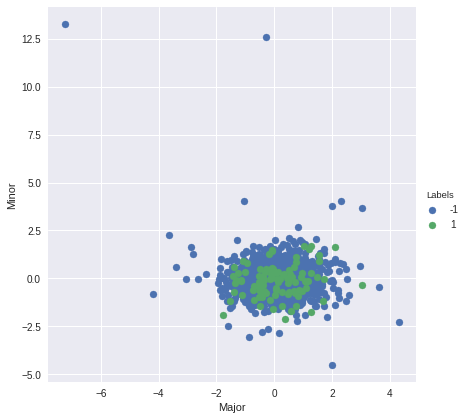

In [25]:
import seaborn as sns
sns.FacetGrid(z,hue='Labels',size=6).map(plt.scatter,'Major','Minor').add_legend()
plt.show()